CNN - DEEP LEARNING MODEL FOCUSE ON GENDER RECOGNITION BY VOICE.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import keras
import os
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import drive
from sklearn.metrics import roc_auc_score

In [ ]:
# google drive conection
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path for the main route
main_path = Path('/content/drive/MyDrive/genderRecognition/mel_spectograms')

# Accessing the processed database:

%cd /content/drive/MyDrive/genderRecognition/mel_spectograms
dir = '/content/drive/MyDrive/genderRecognition/mel_spectograms'
elements = os.listdir(dir)

IMG_SIZE1 = 582
IMG_SIZE2 = 222

counter = 0
y = []
con = 0
for folder in elements:
  dir_folder = dir + '/' + folder
  file_list = os.listdir(folder)
  y = y + [int(folder)] * len(file_list)
  for file in os.listdir(folder):
    image_name = dir_folder + '/' + file
    # Load the processed image:
    im = cv2.imread(image_name)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, (582, 222))
    im = im.reshape(582, 222, 1)
    # x = np.array(im).flatten()
    counter = counter + 1
    print(counter)
    if con == 0:
      X = np.expand_dims(im, axis=0)
    else:
      X = np.concatenate((X, np.expand_dims(im, axis=0)), axis=0)
    con += 1
Y = np.array(y)


**The process is repeated with data partitioning into training and validation sets**

In [ ]:
# Data split into training and validation sets (random Hold-Out):

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=None)
print('Training set size:', X_train.shape)
print('Validation set size:', X_test.shape)

# Convolutional Neural Network (CNN):
CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE1, IMG_SIZE2, 1)),
  tf.keras.layers.MaxPooling2D(3, 3),
  tf.keras.layers.Conv2D(96, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(3, 3),
  tf.keras.layers.Conv2D(288, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(3, 3),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

adam = keras.optimizers.Adam(learning_rate=0.01)
# Compile the models. Binary crossentropy is used as there are only 2 classes (binary classification - dog or cat)

CNN_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
print(CNN_model.summary())


Tamaño del conjunto de entrenamiento: (2198, 582, 222, 1)
Tamaño del conjunto de validación: (389, 582, 222, 1)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 580, 220, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 193, 73, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 191, 71, 96)       27744     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 63, 23, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 21, 288)       249120    
        

In [ ]:
# Train and validate the CNN:
HistoryCNN=modeloCNN.fit(X_train, y_train, epochs=30, batch_size=30,
                    validation_data=(X_test, y_test))


Epoch 1/30
74/74 [==============================] - 10s 121ms/step - loss: 9.8940 - accuracy: 0.5464 - val_loss: 0.6373 - val_accuracy: 0.6452
Epoch 2/30
74/74 [==============================] - 9s 117ms/step - loss: 0.6171 - accuracy: 0.6624 - val_loss: 0.5961 - val_accuracy: 0.7121
Epoch 3/30
74/74 [==============================] - 9s 119ms/step - loss: 0.5839 - accuracy: 0.6847 - val_loss: 0.5370 - val_accuracy: 0.7301
Epoch 4/30
74/74 [==============================] - 9s 116ms/step - loss: 0.5324 - accuracy: 0.7348 - val_loss: 0.4288 - val_accuracy: 0.7969
Epoch 5/30
74/74 [==============================] - 9s 118ms/step - loss: 0.4506 - accuracy: 0.7957 - val_loss: 0.3552 - val_accuracy: 0.8509
Epoch 6/30
74/74 [==============================] - 8s 115ms/step - loss: 0.4170 - accuracy: 0.8167 - val_loss: 0.3725 - val_accuracy: 0.8226
Epoch 7/30
74/74 [==============================] - 9s 119ms/step - loss: 0.4252 - accuracy: 0.8139 - val_loss: 0.3472 - val_accuracy: 0.8715
Epoch

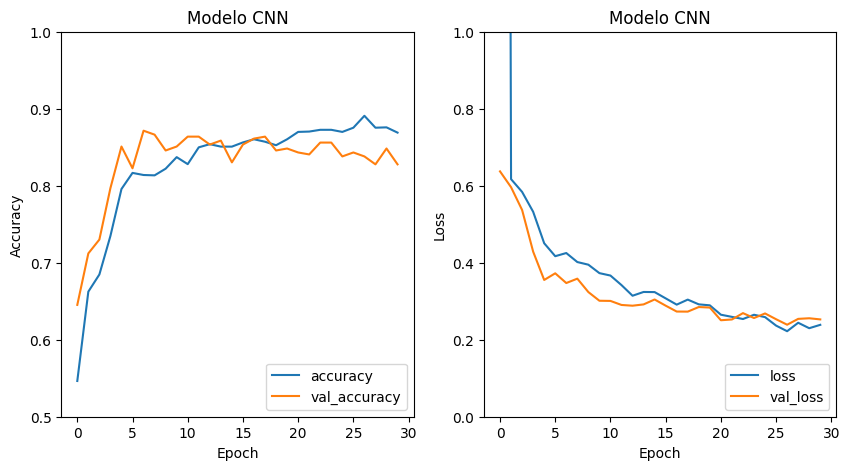

In [ ]:
plt.figure(figsize=(10, 5))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

plt.show()


13/13 [==============================] - 0s 18ms/step
Exactitud CNN: 0.8277634961439588
Sensibilidad (CNN): 0.8109452736318408
CNN:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       188
           1       0.85      0.81      0.83       201

    accuracy                           0.83       389
   macro avg       0.83      0.83      0.83       389
weighted avg       0.83      0.83      0.83       389

AUC: 0.8283449772414523


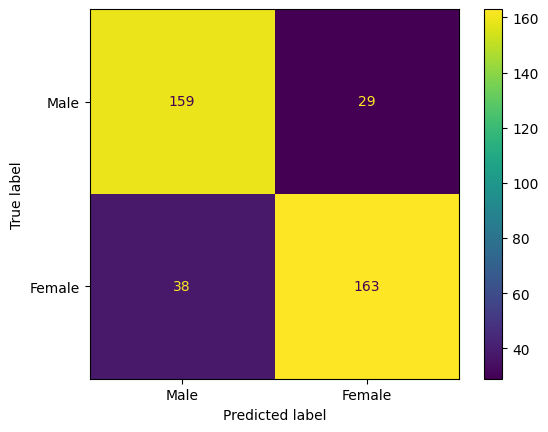

In [ ]:
#Ranking metrics are calculated:
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix
import sklearn.metrics as skm

# Predictions for CNN:
y_pred=modeloCNN.predict(X_test)
y_pred=np.where(y_pred < 0.5, 0, 1)

#Accuracy CNN:
acc = accuracy_score(y_test, y_pred)
print("Exactitud CNN:", acc)

#Sensitivity (Recall) CNN:
sens = recall_score(y_test, y_pred)
print("Sensibilidad (CNN):", sens)

#Calculate the ranking report for CNN:
print('CNN:')
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score}')


#CNN confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Male','Female'])
disp.plot()
plt.show()

